In [ ]:
# THIS iS ONLY EXPERIMENTAL

In [3]:
# Start writing code here...

import pandas as pd
import numpy as np
import seaborn as sns


In [76]:
learning_data = pd.read_csv("full_feature_v2.csv")

In [95]:
from sklearn.model_selection import train_test_split

y = learning_data[['home_win_flag_class']].astype('int')
X = learning_data.iloc[:,1:][[i for i in learning_data.iloc[:,1:].columns if i not in ['home_win_flag_class','home_win_flag','match_id']]]

# y=y.astype('int')



X_train_pre = None
X_test = None
y_train_pre = None
y_test = None
X_train = None
X_validation = None
y_train = None
y_validation = None

X_train_pre, X_test, y_train_pre, y_test = train_test_split(X, y, train_size=0.90, random_state=639)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_pre, y_train_pre, train_size=0.90, random_state=639)

                  
                  
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_train shape: ", X_train.shape)
print("X_validation shape: ", X_validation.shape)
print("y_train shape: ", y_train.shape)
print("y_validation shape: ", y_validation.shape)

X_test shape:  (2523, 762)
y_test shape:  (2523, 1)
X_train shape:  (20428, 762)
X_validation shape:  (2270, 762)
y_train shape:  (20428, 1)
y_validation shape:  (2270, 1)


In [ ]:
# XG boost

In [6]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
pip install xgboost

     |████████████████████████████████| 157.5 MB 67 kB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier


In [7]:
def myscores_class1(conf_mat): 

    acc = np.sum(np.diagonal(conf_mat))/np.sum(conf_mat)

    precision_0 = np.sum(conf_mat[0,0])/np.sum(conf_mat[:,0])
    precision_1 = np.sum(conf_mat[1,1])/np.sum(conf_mat[:,1])
    precision_2 = np.sum(conf_mat[2,2])/np.sum(conf_mat[:,2])

    recall_0 = np.sum(conf_mat[0,0])/np.sum(conf_mat[0,:])
    recall_1 = np.sum(conf_mat[1,1])/np.sum(conf_mat[1,:])
    recall_2 = np.sum(conf_mat[2,2])/np.sum(conf_mat[2,:])


    total_score = (acc*2 + precision_0 + precision_1 + precision_2 + recall_0 + recall_1 + recall_2)/8


    return total_score

In [ ]:
# Tuning dt

In [9]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

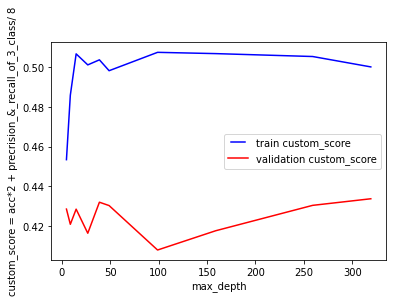

In [33]:
from sklearn.tree import DecisionTreeClassifier





# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini',
#  splitter='best', max_depth=None, min_samples_split=2, 
#  min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#  max_features=None, random_state=None, max_leaf_nodes=None,
#   min_impurity_decrease=0.0, min_impurity_split=None,
#    class_weight=None, ccp_alpha=0.0)


max_depth_list = [5,9,15,27,39,49,99,159,259,319]

train_results = []
validation_results = []
for eta in max_depth_list:
   model = DecisionTreeClassifier(max_depth=eta , max_features = 99  , min_samples_split = 0.02  , class_weight = "balanced")
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)

   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)

   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(max_depth_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc*2 + precrision_&_recall_of_3_class/ 8')
plt.xlabel('max_depth')
plt.show()

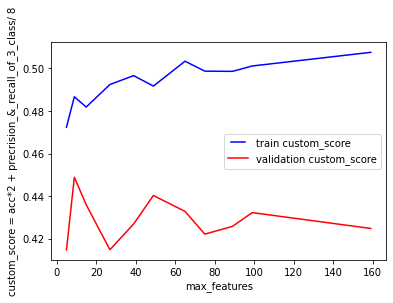

In [34]:


max_features_list =[5,9,15,27,39,49,65,75,89,99,159]

train_results = []
validation_results = []
for eta in max_features_list:
   model = DecisionTreeClassifier(max_depth=39 , max_features = eta  , min_samples_split = 0.02  , class_weight = "balanced")
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)

   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)

   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(max_features_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc*2 + precrision_&_recall_of_3_class/ 8')
plt.xlabel('max_features')
plt.show()

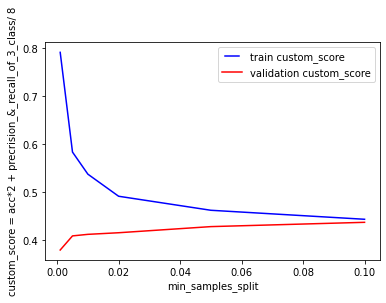

In [36]:
min_samples_split_list = [0.001,0.005,0.01,0.02,0.05,0.1]

train_results = []
validation_results = []
for eta in min_samples_split_list:
   model = DecisionTreeClassifier(max_depth=39 , max_features = 49  , min_samples_split = eta  , class_weight = "balanced" )
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)

   conf_mat = confusion_matrix( y_train , train_pred )
   custom_score = myscores_class1(conf_mat)
    
   train_results.append(custom_score)
   y_pred_valid = model.predict(X_validation)

   conf_mat = confusion_matrix( y_validation , y_pred_valid )
   custom_score = myscores_class1(conf_mat)

   validation_results.append(custom_score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_split_list, train_results, 'b', label = "train custom_score")
line2, = plt.plot(min_samples_split_list, validation_results, 'r', label="validation custom_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('custom_score = acc*2 + precrision_&_recall_of_3_class/ 8')
plt.xlabel('min_samples_split')
plt.show()

In [37]:
Dt_mod = DecisionTreeClassifier(max_depth=39 , max_features = 49  , min_samples_split = eta  , class_weight = "balanced" )

In [38]:
Dt_mod.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=39, max_features=49,
                       min_samples_split=0.1)

In [97]:
Dt_mod.predict_proba(X_test)

array([[0.39, 0.37, 0.24],
       [0.32, 0.34, 0.35],
       [0.58, 0.27, 0.15],
       ...,
       [0.14, 0.27, 0.6 ],
       [0.4 , 0.28, 0.32],
       [0.42, 0.34, 0.24]])

In [40]:
y_true = y_validation.values.ravel()
y_pred = Dt_mod.predict(X_validation)

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[347 167 155]
 [223 169 208]
 [233 283 485]]


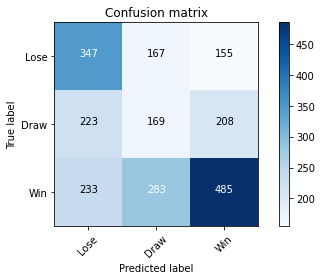

In [43]:
cnf_matrix = confusion_matrix(y_true, y_pred,labels=[0, 1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Lose', 'Draw', 'Win'],
                      title='Confusion matrix')

In [44]:
# validation
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.52      0.47       669
           1       0.27      0.28      0.28       600
           2       0.57      0.48      0.52      1001

    accuracy                           0.44      2270
   macro avg       0.43      0.43      0.42      2270
weighted avg       0.45      0.44      0.44      2270



In [74]:
y_true_test = y_test.values.ravel()
y_pred_test = Dt_mod.predict(X_test)

In [75]:
# test
from sklearn.metrics import classification_report

print(classification_report(y_true_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       749
           1       0.31      0.34      0.33       636
           2       0.61      0.53      0.57      1138

    accuracy                           0.48      2523
   macro avg       0.46      0.46      0.46      2523
weighted avg       0.49      0.48      0.48      2523



In [77]:
# train
y_true_train = y_train.values.ravel()
y_pred_train = Dt_mod.predict(X_train)

In [79]:

print(classification_report(y_true_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.44      0.51      0.47      5849
           1       0.29      0.33      0.31      5168
           2       0.61      0.50      0.55      9411

    accuracy                           0.46     20428
   macro avg       0.45      0.45      0.45     20428
weighted avg       0.48      0.46      0.47     20428



In [ ]:
############################################################################################################ END 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

In [45]:
Dt_mod2 = DecisionTreeClassifier(max_depth=15 , max_features = 49  , min_samples_split = eta  , class_weight = "balanced" )

In [58]:
Dt_mod2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_features=49,
                       min_samples_split=0.1)

In [47]:
y_true2 = y_validation.values.ravel()
y_pred2 = Dt_mod2.predict(X_validation)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

           0       0.41      0.59      0.49       669
           1       0.27      0.21      0.24       600
           2       0.57      0.48      0.52      1001

    accuracy                           0.44      2270
   macro avg       0.42      0.43      0.42      2270
weighted avg       0.45      0.44      0.44      2270



In [49]:
pip install dtreeviz

     |████████████████████████████████| 54 kB 4.2 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.2-py3-none-any.whl size=60007 sha256=3cadd4eb90b3b32f8578c2d74ad7579e7816abe17bb85590683ecf70b1754b68
  Stored in directory: /root/.cache/pip/wheels/e1/a0/1f/6541f2bcdf04d5891f5c614c7575e2db65c03eff2fb2ad9f2a
Successfully built dtreeviz
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [67]:
from dtreeviz.trees import dtreeviz
import pandas as pd
from sklearn import preprocessing, tree

In [69]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20428 entries, 9021 to 21606
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   home_win_flag_class  20428 non-null  int64
dtypes: int64(1)
memory usage: 835.2 KB


In [71]:
viz = dtreeviz(Dt_mod2, X_train, y_train.astype('float').values.ravel(),
                target_name="Home_Win",
                feature_names= X_train.columns,
                class_names = list(["Home_win","Home_Draw","Home_lose"])
                )



# dtreeviz(classifier,
#          df.iloc[:,:3],
#          df.target,
#          target_name='toy',
#          feature_names=df.columns[0:3],
#          class_names=list(label_encoder.classes_)
#          )

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0. 1. 2.], y=[2. 0. 0. ... 0. 2. 1.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0. 1. 2.], y=[2. 0. 0. ... 0. 2. 1.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


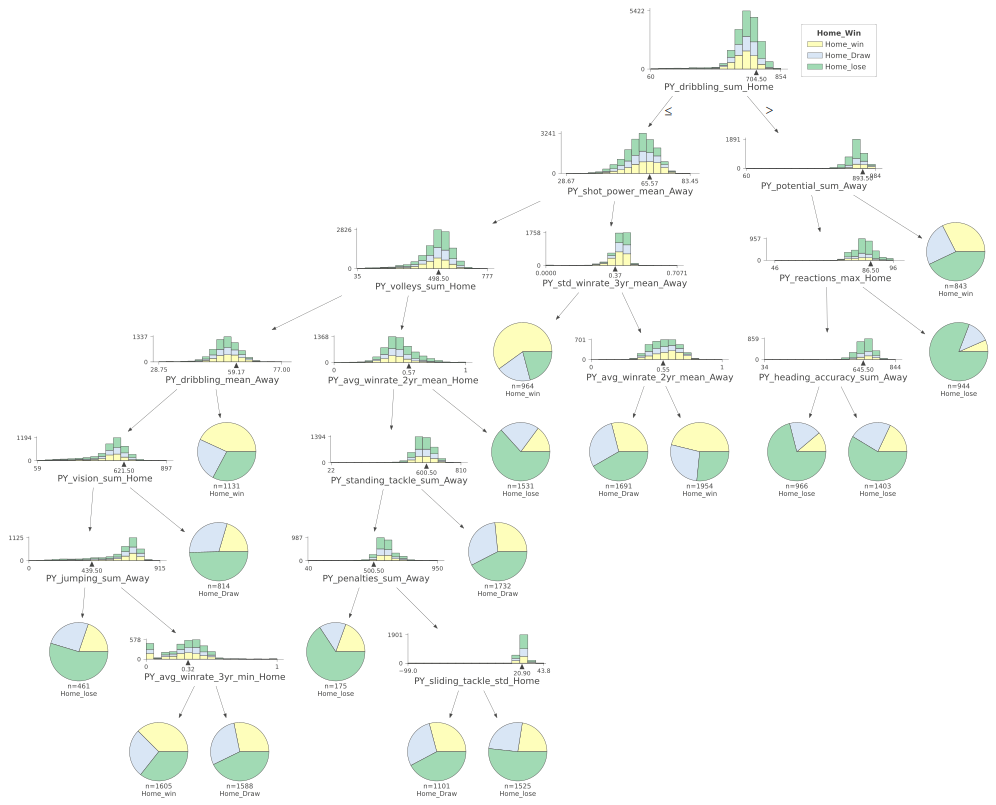

In [73]:
dtreeviz(Dt_mod2, X_train, y_train.astype('float').values.ravel(),
                target_name="Home_Win",
                feature_names= X_train.columns,
                class_names = list(["Home_win","Home_Draw","Home_lose"])
                )

In [53]:
y_train.columns

Index(['home_win_flag_class'], dtype='object')

In [64]:
X_train

,match_year,match_month,country_name,league_name,season,stage,PY_avg_age_Away,PY_avg_age_Home,PY_max_age_Away,PY_max_age_Home,...,conservative_away,buildUpPlay_away,chanceCreation_away,defence_away,abnormal_home,aggresive_home,conservative_home,buildUpPlay_home,chanceCreation_home,defence_home
9021,2008,11,2,2,6,13,26.454545,25.272727,34,30,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
21822,2014,1,3,3,2,18,25.909091,26.090909,31,35,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
13783,2013,8,3,3,2,2,26.181818,25.363636,30,30,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1786,2012,4,6,6,4,34,27.818182,25.090909,31,38,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
12490,2014,12,8,8,0,14,28.090909,28.636364,34,37,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18507,2015,5,9,9,0,34,27.818182,26.090909,33,31,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
21591,2015,5,1,1,0,37,27.636364,29.090909,32,37,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1009,2013,9,1,1,2,6,25.181818,25.363636,30,30,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
15565,2012,9,7,7,3,7,24.545455,26.818182,30,32,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [83]:
df_odd = pd.read_csv("Full_feature_v1_w_odd.csv")

In [176]:
data_odds = df_odd.loc[:,"B365H":"B365A"]
data_odds["match_id"] = df_odd["match_id"]
data_odds["home_match_result"] = df_odd["home_win_flag_class"]

In [178]:
data_odds.head()

,B365H,B365D,B365A,match_id,home_match_result
0,3.0,3.2,2.40,1750765,0
1,2.5,3.2,2.88,1750721,0
2,2.4,3.1,3.10,1750736,1
3,2.5,3.1,2.90,1750748,2
4,2.5,3.1,2.90,1750709,1


In [98]:
X_test.head()

,match_year,match_month,country_name,league_name,season,stage,PY_avg_age_Away,PY_avg_age_Home,PY_max_age_Away,PY_max_age_Home,...,conservative_away,buildUpPlay_away,chanceCreation_away,defence_away,abnormal_home,aggresive_home,conservative_home,buildUpPlay_home,chanceCreation_home,defence_home
591,2013,1,1,1,3,23,27.181818,27.000000,35,33,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
15759,2015,3,3,3,0,26,27.000000,27.545455,35,34,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
1222,2015,1,6,6,0,20,27.000000,27.818182,34,38,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
11531,2016,4,1,1,1,27,29.000000,26.000000,33,31,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0
3492,2011,4,9,9,5,29,28.090909,29.909091,35,35,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0


In [428]:
from sklearn.model_selection import train_test_split

y = learning_data[['home_win_flag_class']].astype('int')
X = learning_data.iloc[:,1:][[i for i in learning_data.iloc[:,1:].columns if i not in ['home_win_flag_class','home_win_flag']]]

X_train_pre = None
X_test = None
y_train_pre = None
y_test = None
X_train = None
X_validation = None
y_train = None
y_validation = None

X_train_pre, X_test, y_train_pre, y_test = train_test_split(X, y, train_size=0.90, random_state=639)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_pre, y_train_pre, train_size=0.90, random_state=639)

                  
                  
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_train shape: ", X_train.shape)
print("X_validation shape: ", X_validation.shape)
print("y_train shape: ", y_train.shape)
print("y_validation shape: ", y_validation.shape)

X_test shape:  (2523, 763)
y_test shape:  (2523, 1)
X_train shape:  (20428, 763)
X_validation shape:  (2270, 763)
y_train shape:  (20428, 1)
y_validation shape:  (2270, 1)


In [326]:
match_id = X_test.match_id

In [327]:
df_master = pd.DataFrame()
df_master["match_id"] = match_id.copy(deep=True)

df_master["Index_list"] = list(range(y_test.shape[0]))

df_master = df_master.set_index("Index_list")
df_master.head()



,match_id
Index_list,
0,1229346
1,1732946
2,1709893
3,1988973
4,954516


In [328]:
X_test = X_test.drop(columns=["match_id"])
X_train = X_train.drop(columns=["match_id"])

#training again to avoid cheating
Dt_mod2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15, max_features=49,
                       min_samples_split=0.1)

In [330]:
y_proba = Dt_mod.predict_proba(X_test)

In [331]:
y_proba = pd.DataFrame(y_proba, columns =["Loss_prob","Draw_prob","Win_prob"])
y_proba.head()
print("y_proba shape : ", y_proba.shape)

y_proba shape :  (2523, 3)


In [332]:
df_master_prob = pd.concat([df_master, y_proba], axis=1)

In [333]:
df_master_prob.head()

,match_id,Loss_prob,Draw_prob,Win_prob
0,1229346,0.389713,0.371490,0.238798
1,1732946,0.315849,0.336846,0.347304
2,1709893,0.584322,0.270134,0.145544
3,1988973,0.387891,0.353549,0.258560
4,954516,0.418204,0.339207,0.242589


In [334]:
y_test["Index_list"] = list(range(y_test.shape[0]))

y_test = y_test.set_index("Index_list")
y_test.head()



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,home_win_flag_class
Index_list,
0,1
1,0
2,2
3,1
4,1


In [335]:
df_master_prob = pd.concat([df_master_prob, y_test], axis=1)

In [336]:
df_master_prob.head()

,match_id,Loss_prob,Draw_prob,Win_prob,home_win_flag_class
0,1229346,0.389713,0.371490,0.238798,1
1,1732946,0.315849,0.336846,0.347304,0
2,1709893,0.584322,0.270134,0.145544,2
3,1988973,0.387891,0.353549,0.258560,1
4,954516,0.418204,0.339207,0.242589,1


In [337]:
data_final = data_odds.merge(df_master_prob, on="match_id")

In [338]:
data_final

,B365H,B365D,B365A,match_id,home_match_result,Loss_prob,Draw_prob,Win_prob,home_win_flag_class
0,2.50,3.1,2.9,1750748,2,0.418204,0.339207,0.242589,2
1,1.91,3.4,4.0,1750759,1,0.396810,0.280687,0.322503,1
2,3.60,3.5,2.0,1989039,1,0.389713,0.371490,0.238798,1
3,4.00,3.6,2.0,1988986,2,0.387891,0.353549,0.258560,2
4,1.73,3.8,5.5,1988956,2,0.206453,0.336047,0.457501,2
...,...,...,...,...,...,...,...,...,...
2518,-99.00,-99.0,-99.0,673784,2,0.244965,0.357128,0.397907,2
2519,-99.00,-99.0,-99.0,506699,2,0.244965,0.357128,0.397907,2
2520,-99.00,-99.0,-99.0,674628,1,0.246868,0.324565,0.428567,1
2521,-99.00,-99.0,-99.0,506755,1,0.418204,0.339207,0.242589,1


In [339]:
data_final[data_final==-99] = np.NaN

In [340]:
data_final = data_final.dropna(axis=0)
data_final

,B365H,B365D,B365A,match_id,home_match_result,Loss_prob,Draw_prob,Win_prob,home_win_flag_class
0,2.50,3.10,2.90,1750748,2,0.418204,0.339207,0.242589,2
1,1.91,3.40,4.00,1750759,1,0.396810,0.280687,0.322503,1
2,3.60,3.50,2.00,1989039,1,0.389713,0.371490,0.238798,1
3,4.00,3.60,2.00,1988986,2,0.387891,0.353549,0.258560,2
4,1.73,3.80,5.50,1988956,2,0.206453,0.336047,0.457501,2
...,...,...,...,...,...,...,...,...,...
2507,4.33,3.50,1.83,1030182,0,0.389713,0.371490,0.238798,0
2508,1.25,6.00,11.00,1479026,2,0.138580,0.265070,0.596350,2
2512,4.00,3.75,1.83,1028823,2,0.396810,0.280687,0.322503,2
2514,2.45,3.50,3.00,1724148,2,0.387891,0.353549,0.258560,2


In [341]:
data_final["Bet_Win_prob"] = 1/data_final["B365H"]
data_final["Bet_Draw_prob"] = 1/data_final["B365D"]
data_final["Bet_Loose_prob"] = 1/data_final["B365A"]
data_final["Bet_Amount"] = 0
data_final["Winnings/Losses"] = 0

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [345]:
data_final

,B365H,B365D,B365A,match_id,home_match_result,Loss_prob,Draw_prob,Win_prob,home_win_flag_class,Bet_Win_prob,Bet_Draw_prob,Bet_Loose_prob,Bet_Amount,Winnings/Losses
0,2.50,3.10,2.90,1750748,2,0.418204,0.339207,0.242589,2,0.400000,0.322581,0.344828,0,0.0
1,1.91,3.40,4.00,1750759,1,0.396810,0.280687,0.322503,1,0.523560,0.294118,0.250000,0,0.0
2,3.60,3.50,2.00,1989039,1,0.389713,0.371490,0.238798,1,0.277778,0.285714,0.500000,0,0.0
3,4.00,3.60,2.00,1988986,2,0.387891,0.353549,0.258560,2,0.250000,0.277778,0.500000,0,0.0
4,1.73,3.80,5.50,1988956,2,0.206453,0.336047,0.457501,2,0.578035,0.263158,0.181818,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,4.33,3.50,1.83,1030182,0,0.389713,0.371490,0.238798,0,0.230947,0.285714,0.546448,0,0.0
2508,1.25,6.00,11.00,1479026,2,0.138580,0.265070,0.596350,2,0.800000,0.166667,0.090909,0,0.0
2512,4.00,3.75,1.83,1028823,2,0.396810,0.280687,0.322503,2,0.250000,0.266667,0.546448,0,0.0
2514,2.45,3.50,3.00,1724148,2,0.387891,0.353549,0.258560,2,0.408163,0.285714,0.333333,0,0.0


### Betting Game for Win

In [364]:
for i in range(data_final.shape[0]):
    if data_final["Win_prob"].iloc[i] > 0.6 :
        data_final["Bet_Amount"].iloc[i] = 100
    else:
        data_final["Bet_Amount"].iloc[i] = 0
    if data_final["home_match_result"].iloc[i] == 2:
        data_final["Winnings/Losses"].iloc[i] = data_final["Bet_Amount"].iloc[i]*data_final["B365H"].iloc[i]
    else:
        data_final["Winnings/Losses"].iloc[i] = -1*data_final["Bet_Amount"].iloc[i]



In [365]:
print("Total Amount Invested :", data_final.Bet_Amount.sum())
print("Total Amount At the End :", data_final["Winnings/Losses"].sum())

Total Amount Invested : 7600
Total Amount At the End : 7320.0


### Betting game for Winning by comparing with Betting Odds

In [399]:
for i in range(data_final.shape[0]):
    if data_final["Win_prob"].iloc[i]  > 0.4 and data_final["Bet_Win_prob"].iloc[i] > 0.75 :
        data_final["Bet_Amount"].iloc[i] = 100
    else:
        data_final["Bet_Amount"].iloc[i] = 0
    if data_final["home_match_result"].iloc[i] == 2:
        data_final["Winnings/Losses"].iloc[i] = data_final["Bet_Amount"].iloc[i]*data_final["B365H"].iloc[i]
    else:
        data_final["Winnings/Losses"].iloc[i] = -1*data_final["Bet_Amount"].iloc[i]

        #- data_final["Bet_Win_prob"].iloc[i]

In [400]:
print("Total Amount Invested :", data_final.Bet_Amount.sum())
print("No. of bets made: ",data_final.Bet_Amount.sum()/100)
print("Total Amount At the End :", data_final["Winnings/Losses"].sum())

Total Amount Invested : 21100
No. of bets made:  211.0
Total Amount At the End : 17700.0


In [381]:
data_final[data_final["Bet_Amount"]==100]

,B365H,B365D,B365A,match_id,home_match_result,Loss_prob,Draw_prob,Win_prob,home_win_flag_class,Bet_Win_prob,Bet_Draw_prob,Bet_Loose_prob,Bet_Amount,Winnings/Losses
2323,2.80,3.5,2.4,1732740,2,0.13858,0.26507,0.59635,2,0.357143,0.285714,0.416667,100,280.0
2436,2.88,3.0,2.6,483225,1,0.13858,0.26507,0.59635,1,0.347222,0.333333,0.384615,100,-100.0


# betting on draw and loss

In [439]:
data_final["Bet_Amount_draw"] = 0
data_final["Winnings/Losses_draw"] = 0

data_final["Bet_Amount_loss"] = 0
data_final["Winnings/Losses_loss"] = 0

In [403]:
#Draw betting game

In [404]:
for i in range(data_final.shape[0]):
    if data_final["Draw_prob"].iloc[i]  > 0.33:
        data_final["Bet_Amount_draw"].iloc[i] = 100
    else:
        data_final["Bet_Amount_draw"].iloc[i] = 0
    if data_final["home_match_result"].iloc[i] == 1:
        data_final["Winnings/Losses_draw"].iloc[i] = data_final["Bet_Amount_draw"].iloc[i]*data_final["B365H"].iloc[i]
    else:
        data_final["Winnings/Losses_draw"].iloc[i] = -1*data_final["Bet_Amount_draw"].iloc[i]

        #- data_final["Bet_Win_prob"].iloc[i]

#loose betting game

In [423]:
for i in range(data_final.shape[0]):
    if data_final["Loss_prob"].iloc[i]  > 0.4 and data_final.Bet_Loose_prob.iloc[i] > 0.75:
        data_final["Bet_Amount_loss"].iloc[i] = 100
    else:
        data_final["Bet_Amount_loss"].iloc[i] = 0
    if data_final["home_match_result"].iloc[i] == 1:
        data_final["Winnings/Losses_loss"].iloc[i] = data_final["Bet_Amount_loss"].iloc[i]*data_final["B365H"].iloc[i]
    else:
        data_final["Winnings/Losses_loss"].iloc[i] = -1*data_final["Bet_Amount_loss"].iloc[i]

In [424]:
print("Total Amount Invested in loss :", data_final.Bet_Amount_loss.sum())
print("Total Amount from loss :", data_final["Winnings/Losses_loss"].sum())

Total Amount Invested in loss : 3300
Total Amount from loss : 1600.0


In [413]:
print("Total Amount Invested in win :", data_final.Bet_Amount.sum())
print("Total Amount from wins :", data_final["Winnings/Losses"].sum())

print("Total Amount Invested in draw :", data_final.Bet_Amount_draw.sum())
print("Total Amount from draw :", data_final["Winnings/Losses_draw"].sum())

print("Total Amount Invested in loss :", data_final.Bet_Amount_loss.sum())
print("Total Amount from loss :", data_final["Winnings/Losses_loss"].sum())

print("Total amount invested :",data_final.Bet_Amount.sum()+data_final.Bet_Amount_draw.sum()+data_final.Bet_Amount_loss.sum())

print("Total amount at the end :",data_final["Winnings/Losses"].sum()+data_final["Winnings/Losses_draw"].sum()+data_final["Winnings/Losses_loss"].sum())

Total Amount Invested in win : 21100
Total Amount from wins : 17700.0
Total Amount Invested in draw : 134900
Total Amount from draw : -16588.0
Total Amount Invested in loss : 13500
Total Amount from loss : 9151.0
Total amount invested : 169500
Total amount at the end : 10263.0


In [425]:
#final game, invest if win-probability by model is > 0.5 and bet implied probability is < 0.5

In [432]:
for i in range(520,531,1):
        X_train_pre, X_test, y_train_pre, y_test = train_test_split(X, y, train_size=i)
        X_train, X_validation, y_train, y_validation = train_test_split(X_train_pre, y_train_pre, train_size=0.90, random_state=i)

        Dt_mod.fit(X_train,y_train)
        y_pred = Dt_mod.predict_proba(X_test)

        df_master = pd.DataFrame()
        df_master["match_id"] = X_test.match_id.copy(deep=True)
        
        df_master["Index_list"] = list(range(y_test.shape[0]))
        
        df_master = df_master.set_index("Index_list")

        X_test = X_test.drop(columns=["match_id"])
        X_train = X_train.drop(columns=["match_id"])
        
        #training again to avoid cheating
        Dt_mod.fit(X_train,y_train)
        
        y_proba = Dt_mod.predict_proba(X_test)
        
        y_proba = pd.DataFrame(y_proba, columns =["Loss_prob","Draw_prob","Win_prob"])
 
        df_master_prob = pd.concat([df_master, y_proba], axis=1)
        
        y_test["Index_list"] = list(range(y_test.shape[0]))
        
        y_test = y_test.set_index("Index_list")
        
        df_master_prob = pd.concat([df_master_prob, y_test], axis=1)
        
        data_final = data_odds.merge(df_master_prob, on="match_id")
        
        data_final[data_final==-99] = np.NaN
        
        data_final = data_final.dropna(axis=0)

        data_final["Bet_Win_prob"] = 1/data_final["B365H"]
        data_final["Bet_Draw_prob"] = 1/data_final["B365D"]
        data_final["Bet_Loose_prob"] = 1/data_final["B365A"]
        data_final["Bet_Amount"] = 0
        data_final["Winnings/Losses"] = 0


        for i in range(data_final.shape[0]):
            if data_final["Win_prob"].iloc[i]  > 0.5 and data_final["Bet_Win_prob"].iloc[i] < 0.5 :
                data_final["Bet_Amount"].iloc[i] = 100
            else:
                data_final["Bet_Amount"].iloc[i] = 0
            if data_final["home_match_result"].iloc[i] == 2:
                data_final["Winnings/Losses"].iloc[i] = data_final["Bet_Amount"].iloc[i]*data_final["B365H"].iloc[i]
            else:
                data_final["Winnings/Losses"].iloc[i] = -1*data_final["Bet_Amount"].iloc[i]
        
        print("Total Amount Invested :", data_final.Bet_Amount.sum())
        print("No. of bets made: ",data_final.Bet_Amount.sum()/100)
        print("Total Amount At the End :", data_final["Winnings/Losses"].sum())
            



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
Total Amount Invested : 193500
No. of bets made:  1935.0
Total Amount At the End : 64420.0
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [434]:
data_final

,B365H,B365D,B365A,match_id,home_match_result,Loss_prob,Draw_prob,Win_prob,home_win_flag_class,Bet_Win_prob,Bet_Draw_prob,Bet_Loose_prob,Bet_Amount,Winnings/Losses
0,3.00,3.2,2.40,1750765,0,0.538792,0.041513,0.419695,0,0.333333,0.312500,0.416667,0,0.0
1,2.50,3.2,2.88,1750721,0,0.000000,0.126304,0.873696,0,0.400000,0.312500,0.347222,100,-100.0
2,2.40,3.1,3.10,1750736,1,0.538792,0.041513,0.419695,1,0.416667,0.322581,0.322581,0,0.0
3,2.50,3.1,2.90,1750748,2,0.538792,0.041513,0.419695,2,0.400000,0.322581,0.344828,0,0.0
4,2.50,3.1,2.90,1750709,1,0.329297,0.258327,0.412376,1,0.400000,0.322581,0.344828,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24640,1.29,6.0,12.00,1474511,2,0.152758,0.225977,0.621264,2,0.775194,0.166667,0.083333,0,0.0
24641,8.00,4.5,1.33,1028716,0,0.887127,0.054681,0.058192,0,0.125000,0.222222,0.751880,0,0.0
24642,2.40,3.6,2.80,1733024,2,0.538792,0.041513,0.419695,2,0.416667,0.277778,0.357143,0,0.0
24661,5.25,4.5,1.53,1479303,0,0.887127,0.054681,0.058192,0,0.190476,0.222222,0.653595,0,0.0


In [435]:
data_final['odd_betting'] = np.where(  (  data_final['B365H'] <=data_final['B365D'] ) & (  data_final['B365H'] <=data_final['B365A'] ),2  ,
                                np.where(  (  data_final['B365D'] <=data_final['B365H'] ) & (  data_final['B365D'] <=data_final['B365A'] ),1  ,       
                                  np.where(  (  data_final['B365A'] <=data_final['B365H'] ) & (  data_final['B365A'] <=data_final['B365D'] ),0  ,  0  
                                   
                                   )))

In [437]:
data_final.to_csv(odds_from_bettingsite.csv)

NameError: name 'odds_from_bettingsite' is not defined

In [441]:
        for i in range(data_final.shape[0]):
            if data_final['odd_betting'].iloc[i]  == 2:
                data_final["Bet_Amount"].iloc[i] = 100
            elif data_final["odd_betting"].iloc[i] == 1:
                data_final["Bet_Amount_draw"].iloc[i] = 100
            elif data_final["odd_betting"].iloc[i] == 0:
                data_final["Bet_Amount_loss"].iloc[i] = 100


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [445]:
data_final["gain_loss"] = (data_final["odd_betting"]==data_final["home_win_flag_class"])

In [446]:
data_final.head()

,B365H,B365D,B365A,match_id,home_match_result,Loss_prob,Draw_prob,Win_prob,home_win_flag_class,Bet_Win_prob,Bet_Draw_prob,Bet_Loose_prob,Bet_Amount,Winnings/Losses,odd_betting,Bet_Amount_draw,Winnings/Losses_draw,Bet_Amount_loss,Winnings/Losses_loss,gain_loss
0,3.0,3.2,2.40,1750765,0,0.538792,0.041513,0.419695,0,0.333333,0.312500,0.416667,0,0.0,0,0,0,100,0,True
1,2.5,3.2,2.88,1750721,0,0.000000,0.126304,0.873696,0,0.400000,0.312500,0.347222,100,-100.0,2,0,0,0,0,False
2,2.4,3.1,3.10,1750736,1,0.538792,0.041513,0.419695,1,0.416667,0.322581,0.322581,100,0.0,2,0,0,0,0,False
3,2.5,3.1,2.90,1750748,2,0.538792,0.041513,0.419695,2,0.400000,0.322581,0.344828,100,0.0,2,0,0,0,0,True
4,2.5,3.1,2.90,1750709,1,0.329297,0.258327,0.412376,1,0.400000,0.322581,0.344828,100,0.0,2,0,0,0,0,False


In [450]:
for i in range(data_final.shape[0]):
    if data_final["gain_loss"].iloc[i] == True:
        if data_final["odd_betting"].iloc[i] == 2:
            data_final["Winnings/Losses"].iloc[i] == data_final["Bet_Amount"].iloc[i]*data_final["B365H"].iloc[i]
        elif data_final["odd_betting"].iloc[i] == 1:
            data_final["Winnings/Losses_draw"].iloc[i] == data_final["Bet_Amount_draw"].iloc[i]*data_final["B365D"].iloc[i]
        else:
            data_final["Winnings/Losses_loss"].iloc[i] == data_final["Bet_Amount_draw"].iloc[i]*data_final["B365A"].iloc[i]

        if data_final["gain_loss"].iloc[i] == False:
            if data_final["odd_betting"].iloc[i] == 2:
                data_final["Winnings/Losses"].iloc[i] == -100
            elif data_final["odd_betting"].iloc[i] == 1:
                data_final["Winnings/Losses_draw"].iloc[i] == -100
            else:
                data_final["Winnings/Losses_loss"].iloc[i] == -100
        


In [452]:
        print("betting on winning :")
        print("Total Amount Invested:", data_final.Bet_Amount.sum())
        print("No. of bets made: ",data_final.Bet_Amount.sum()/100)
        print("Total Amount At the End : ", data_final["Winnings/Losses"].sum())

        print("--------------------------------------")

        print("betting on draw :")
        print("Total Amount Invested:", data_final.Bet_Amount_draw.sum())
        print("No. of bets made: ",data_final.Bet_Amount_draw.sum()/100)
        print("Total Amount At the End : ", data_final["Winnings/Losses_draw"].sum())

        print("--------------------------------------")
        
        print("betting on loss :")
        print("Total Amount Invested:", data_final.Bet_Amount_loss.sum())
        print("No. of bets made: ",data_final.Bet_Amount_loss.sum()/100)
        print("Total Amount At the End : ", data_final["Winnings/Losses_loss"].sum())

betting on winning :
Total Amount Invested: 1616800
No. of bets made:  16168.0
Total Amount At the End :  60370.0
--------------------------------------
betting on draw :
Total Amount Invested: 2800
No. of bets made:  28.0
Total Amount At the End :  0
--------------------------------------
betting on loss :
Total Amount Invested: 586900
No. of bets made:  5869.0
Total Amount At the End :  0


In [453]:
data_final["odd_betting"]

0        0
1        2
2        2
3        2
4        2
        ..
24640    2
24641    0
24642    2
24661    0
24662    0
Name: odd_betting, Length: 21607, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6b5571c-3371-4962-8cb6-e4ca8ff410ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>